# Usage Example: Trace Extraction

This example explains how to extract photobleaching traces from an image stack using a file with localizations for the points of interest. quickpbsa as well as tifffile and matplotlib need to be installed to run the notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import quickpbsa as pbsa
import tifffile

%matplotlib notebook

## Input Data

In Examples/Data you find the ImageStack 'ExampleStack.tif' as well as a localization file 'ExampleStack_tsoutput.tif' that was generated with ThunderSTORM. The background corrected traces file 'ExampleStack_difference.csv' is also already present, but will be overwritten by this notebook, which you will notice if you start changing settings.

In [2]:
tiffstack = './Data/ExampleStack.tif'
tsout = './Data/ExampleStack_tsoutput.csv'

### Image Stack

The tiffstack is part of a measurement of DNA Origami with 9 binding sites, labelled with Atto647N. To reduce size the data has been binned by a factor of 2 in x and y and by a factor of 20 in frames. 

<IPython.core.display.Javascript object>


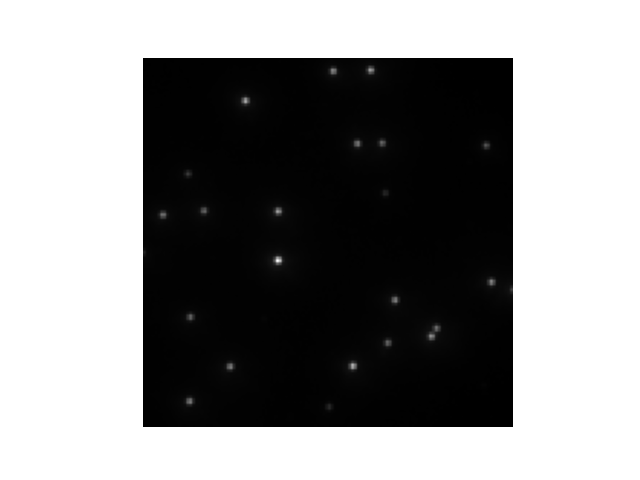

In [3]:
im = tifffile.imread(tiffstack)
plt.figure()
plt.imshow(im[0,:,:], cmap='gray')
plt.axis('off')
plt.show()

### Localization File

In [4]:
pd.read_csv(tsout).loc[:5,:]

,id,x [nm],y [nm],sigma [nm],intensity [photon]
0,1,1323.97331,10382.87677,137.91881,1390.67689
1,2,2973.21481,7682.14994,138.17243,694.57592
2,3,3123.68611,17095.39939,138.20926,1257.29196
3,4,3074.09828,22629.48721,134.92371,1555.16189
4,5,4014.61271,10108.24932,134.19890,1186.57157
5,6,5736.30663,20352.34091,136.62630,1599.59023


The localization file was generated with the ImageJ plugin ThunderSTORM from an average of the first 5 images of the stack. But for the trace extraction any localization file which contains the columns "x \[nm\]" and "y \[nm\]" will work. Any additional column in the localization file can be used to filter localizations by passing it to the filters argument in trace extraction:

```python
pbsa.trace_extraction.extract_traces_localization(tiffstack, tsout, rpeak, rbg1, rbg2, mindist,
                                                  filters={'sigma [nm]': [40, 200]})
```

## Running the trace extraction

Running the trace extraction is accomplished with a single line.

In [5]:
rpeak = 3  # radius of the ROI
rbg1 = 4   # inner radius of the background ring 
rbg2 = 6   # outer radius of the background ring
mindist = 6 # minimum distance between ROI peak positions
pbsa.trace_extraction.extract_traces_localization(tiffstack, tsout, rpeak, rbg1, rbg2, mindist);

## Output

In [6]:
peak_file = './Data/ExampleStack_peak.csv'
bg_file = './Data/ExampleStack_bg.csv'
diff_file = './Data/ExampleStack_difference.csv'
# First line
print(open(diff_file).readline())
# Difference Traces
diff = pd.read_csv(diff_file, header=1)
diff.loc[:5,:]

# {'pix_x': 128, 'pix_y': 128, 'pix_size': 190.0002850004275, 'r_peak': 3, 'r_bg1': 4, 'r_bg2': 6, 'min_dist': 6, 'binning': 1}



,id,x [nm],y [nm],sigma [nm],intensity [photon],center_pix,0,1,2,3,...,990,991,992,993,994,995,996,997,998,999
0,1,1323.97331,10382.87677,137.91881,1390.67689,6918,2108.054147,2057.048387,2130.452765,1888.403226,...,9.100230,10.105991,15.228111,19.173963,17.168203,7.199309,16.447005,15.807604,10.099078,15.387097
1,2,2973.21481,7682.14994,138.17243,694.57592,5135,976.176068,870.417094,814.810826,856.723077,...,-10.324786,-2.817094,-5.583476,-9.177208,-1.682621,-0.427920,5.531624,0.610826,-3.955556,1.502564
2,3,3123.68611,17095.39939,138.20926,1257.29196,11408,1868.709016,1885.335480,1773.676815,1892.166862,...,-4.848946,-2.997073,1.855386,-6.028103,-1.468384,-5.820843,1.923888,-0.889930,-0.092506,-12.531030
3,4,3074.09828,22629.48721,134.92371,1555.16189,15248,2285.798491,2220.134698,2240.531250,1943.405172,...,12.346444,10.218211,12.751616,8.892780,10.561961,7.872306,16.672953,18.081358,8.659483,5.337284
4,5,4014.61271,10108.24932,134.19890,1186.57157,6805,1818.690716,1789.437135,1822.765517,1850.262599,...,-0.469496,-2.966578,0.933687,1.658355,1.883820,-2.405836,2.565517,1.096552,2.436605,-0.356499
5,6,5736.30663,20352.34091,136.62630,1599.59023,13726,2314.493534,2388.341056,2336.439655,2337.733297,...,5.568427,5.265625,7.882004,9.359375,3.905711,7.251078,3.837823,5.430496,5.290948,5.197198


The main output files '\_peak.csv', '\_bg.csv', and '\_difference.csv' all have the same structure. The first line is a comment with the parameters, then follows a DataFrame with each row corresponding to one trace. After the columns from the localization file follow the columns `'0'...` for the trace data. 

### Example Trace

<IPython.core.display.Javascript object>


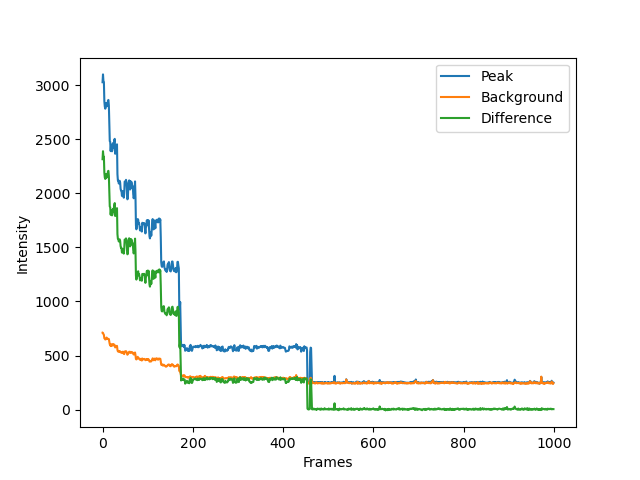

In [7]:
peak = pd.read_csv(peak_file, header=1)
bg = pd.read_csv(bg_file, header=1)

plt.figure()
plt.plot(np.array(peak.loc[5,'0':]), label='Peak')
plt.plot(np.array(bg.loc[5,'0':]), label='Background')
plt.plot(np.array(diff.loc[5,'0':]), label='Difference')
plt.legend()
plt.xlabel('Frames')
plt.ylabel('Intensity')
plt.show()

Since there is very little fluorescent background in the DNA Origami measurements, the background subtraction mainly removes a constant offset. But background subtraction is useful nonetheless, since it makes identifying traces which are not fully bleached much easier.

### Additional output files